# 1 - Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from numpy import mean
from tabulate import tabulate

pd.set_option('display.float_format', '{:.2f}'.format)

# 2 - Helper functions

## 2.1 Get data

In [58]:
def get_data (path):
    
    data = pd.read_csv(path)
    
    return data

def describe(data):
    
    num_attributes = data.select_dtypes( include=['int64', 'float64'] )
    media = pd.DataFrame( num_attributes.apply( np.mean ) )
    mediana = pd.DataFrame( num_attributes.apply( np.median ) )
    std = pd.DataFrame( num_attributes.apply( np.std ) )

    max_ = pd.DataFrame( num_attributes.apply( np.max ) ) 
    min_ = pd.DataFrame( num_attributes.apply( np.min ) ) 

    df_sc = pd.concat([max_, min_, media, mediana, std], axis=1 ).reset_index()
    df_sc.columns = ['attributes', 'max', 'min', 'mean', 'median', 'std']
    
    return df_sc

## 2.2 Add columns and tabulation

In [3]:
def add_columns(data):
    
    #Tipo de imóvel baseado na quantidade de quartos
    data['domitory_type'] = data['bedrooms'].apply(lambda x: 'studio'     if x == 1 else
                                                             'apartament' if x == 2 else 'house')
    
    #Condição do imóvel
    data['condition_type'] = data['condition'].apply(lambda x: 'bad'     if  x <= 2 else 
                                                               'regular' if (x == 3) | (x == 4) else 'good')
    
    #Tamanho da sala
    data['size'] = data['sqft_living'].apply(lambda x: 'size 0' if  x <= 1427 else
                                                       'size 1' if (x > 1427) & (x <= 1910) else
                                                       'size 2' if (x > 1910) & (x <= 2550) else 'size 3')
    
    #Imóvel renovado ou não
    data['is_renovated'] = data['yr_renovated'].apply(lambda x: 'not renovated' if x == 0 else 'renovated')
    
    #Com ou sem vista para água
    data['is_waterfront'] = data['waterfront'].apply(lambda x: 'yes' if x == 1 else 'no')
    
    #Idade do imóvel baseado no ano de construção
    data['house_age'] = data['yr_built'].apply(lambda x: 'old' if x <= 2000 else 'new')
    
    #Extraindo o ano do campo "date"
    data['date'] = pd.to_datetime(data['date'], format= '%Y-%m-%d')
    data['yr_date'] = data['date'].apply(lambda x: x.year)
    
    #Extraindo o mês do campo "date"
    data['month_date'] = data['date'].apply(lambda x: x.month)
    
    return data

## 2.3 Plotting

In [4]:
def plot_bar(data, x, y, hue=None, palette=None, estimator=mean):
    
    sns.set_theme()
    fig, ax = plt.subplots(figsize=(10,8))
    sns.barplot(data=data, x=x, y=y, estimator=estimator, hue=hue, palette=palette,ax=ax)
    
    return None
    

def plot_bar_hist(data, x, y, hue=None, estimator=mean):
    
    fig, ax = plt.subplots(ncols=2, figsize=(15,8))
    sns.barplot(data=data, x=x, y=y, hue=hue, estimator=estimator, ax=ax[0])
    sns.histplot(data=data, x=y, kde=True, hue=hue, ax=ax[1])
    
    plt.show()
    
    return None

def plot_count_hist(data, x, y, hue=None):
    
    fig, ax = plt.subplots(ncols=2, figsize=(15,8))
    sns.countplot(data=data, x=x, ax=ax[0])
    sns.histplot(data=data, x=y, kde=True, hue=hue, ax=ax[1])
        
    plt.show()
    
    return None
    
def plot_count_bar(data, x, y, hue=None, palette=None):
    
    fig, ax = plt.subplots(ncols=2, figsize=(15,8))
    sns.countplot(data=data, x=x, hue=hue, palette=palette, ax=ax[0])
    sns.barplot(data=data, x=x, y=y, estimator=mean, hue=hue, ax=ax[1])
    
    plt.show()
    
    return None

def plot_strip(data, x, y, hue=None, palette=None):
    
    fig, ax = plt.subplots(figsize=(10,8))
    sns.stripplot(data=data, x=x, y=y, hue=hue, palette=palette, ax=ax)
    
    plt.show()
    
    return None

# 3 - Data description

## 3.1 Dataframe

In [5]:
# Carregando os dados
data = get_data('kc_house_data.csv')


#Adicionando colunas
add_columns(data)

data.head()

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13 221900.00         3       1.00         1180   
1  6414100192 2014-12-09 538000.00         3       2.25         2570   
2  5631500400 2015-02-25 180000.00         2       1.00          770   
3  2487200875 2014-12-09 604000.00         4       3.00         1960   
4  1954400510 2015-02-18 510000.00         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_living15  sqft_lot15  \
0      5650    1.00           0     0  ...           1340        5650   
1      7242    2.00           0     0  ...           1690        7639   
2     10000    1.00           0     0  ...           2720        8062   
3      5000    1.00           0     0  ...           1360        5000   
4      8080    1.00           0     0  ...           1800        7503   

   domitory_type  condition_type    size   is_renovated  is_waterfront  \
0          house         regular  size 0  not renovated             no   
1          house         regular  size 3      renovated             no   
2     apartament         regular  size 0  not renovated             no   
3          house            good  size 2  not renovated             no   
4          house         regular  size 1  not renovated             no   

   house_age  yr_date  month_date  
0        old     2014          10  
1        old     2014          12  
2        old     2015           2  
3        old     2014          12  
4        old     2015           2  

[5 rows x 29 columns]

## 3.2 Columns

In [6]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'domitory_type',
       'condition_type', 'size', 'is_renovated', 'is_waterfront', 'house_age',
       'yr_date', 'month_date'],
      dtype='object')

Descrição

    • id: Notação para cada imóvel
    • date: Data de venda da imóvel
    • price: Preço de venda da imóvel
    • bedrooms: Número de quartos
    • bathrooms: Número de banheiros
    • sqft_living: Metragem quadrada da sala de estar
    • sqrt_log: Metragem quadrada do lote
    • floors: Quantidade de andares
    • waterfront: Vista para a água
    • view: Foi visualizado
    • condition: Condição do imóvel
    • grade: Nota geral dada à unidade habitacional
    • sqft_above: Metragem quadrada do imóvel
    • sqft_basement: Metragem quadrada do porão
    • yr_built: Ano de construção
    • yr_renovated: Ano em que o imóvel foi reformado
    • zipcode: Código postal
    • lat: Latitude
    • long: Longitude
    • sqft_living15: Metragem quadrada da sala de estar em 2015 (implica em algumas renovações)
    • sqrt_lot15: Metragem quadrada do lote em 2015 (implica em algumas renovações)
    • dormitory_type: Classificação do imóvel baseado na quantidade de quartos
    • condition_type: Classificação da condição de conversação do imóvel
    • size: Classificação do tamanho do imóvel baseado no tamanho da sala de estar
    • is_renovated: Se o imóvel foi reformado ou não
    • is_waterfront: Se o imóvel possui vista para a água
    • house_age: Classificação do imóvel se é antigo (old) ou novo (new)
    • yr_date: Ano da data de venda do imóvel
    • month_date: Mês da data de venda do imóvel

## 3.3 Data dimension

In [7]:
print(f'A quantidade de linhas do dataframe é: {data.shape[0]}')
print(f'A quantidade de colunas do dataframe é: {data.shape[1]}')

A quantidade de linhas do dataframe é: 21613
A quantidade de colunas do dataframe é: 29


## 3.4 Data types

In [8]:
data.dtypes

id                         int64
date              datetime64[ns]
price                    float64
bedrooms                   int64
bathrooms                float64
sqft_living                int64
sqft_lot                   int64
floors                   float64
waterfront                 int64
view                       int64
condition                  int64
grade                      int64
sqft_above                 int64
sqft_basement              int64
yr_built                   int64
yr_renovated               int64
zipcode                    int64
lat                      float64
long                     float64
sqft_living15              int64
sqft_lot15                 int64
domitory_type             object
condition_type            object
size                      object
is_renovated              object
is_waterfront             object
house_age                 object
yr_date                    int64
month_date                 int64
dtype: object

## 3.5 Data describe

In [59]:
describe(data)

attributes           max        min          mean        median  \
0              id 9900000190.00 1000102.00 4580301520.86 3904930410.00   
1           price    7700000.00   75000.00     540088.14     450000.00   
2        bedrooms         33.00       0.00          3.37          3.00   
3       bathrooms          8.00       0.00          2.11          2.25   
4     sqft_living      13540.00     290.00       2079.90       1910.00   
5        sqft_lot    1651359.00     520.00      15106.97       7618.00   
6          floors          3.50       1.00          1.49          1.50   
7      waterfront          1.00       0.00          0.01          0.00   
8            view          4.00       0.00          0.23          0.00   
9       condition          5.00       1.00          3.41          3.00   
10          grade         13.00       1.00          7.66          7.00   
11     sqft_above       9410.00     290.00       1788.39       1560.00   
12  sqft_basement       4820.00       0.00        291.51          0.00   
13       yr_built       2015.00    1900.00       1971.01       1975.00   
14   yr_renovated       2015.00       0.00         84.40          0.00   
15        zipcode      98199.00   98001.00      98077.94      98065.00   
16            lat         47.78      47.16         47.56         47.57   
17           long       -121.31    -122.52       -122.21       -122.23   
18  sqft_living15       6210.00     399.00       1986.55       1840.00   
19     sqft_lot15     871200.00     651.00      12768.46       7620.00   
20        yr_date       2015.00    2014.00       2014.32       2014.00   
21     month_date         12.00       1.00          6.57          6.00   

             std  
0  2876499023.43  
1      367118.70  
2           0.93  
3           0.77  
4         918.42  
5       41419.55  
6           0.54  
7           0.09  
8           0.77  
9           0.65  
10          1.18  
11        828.07  
12        442.56  
13         29.37  
14        401.67  
15         53.50  
16          0.14  
17          0.14  
18        685.38  
19      27303.55  
20          0.47  
21          3.12

# 4 - Hypotheses

- H1: Imóveis com vista para a água são 30% mais caros, na média
- H2: Imóveis com data de construção menor que 1955 são 50% mais baratos, na média
- H3: Imóveis sem porão, são 50% maiores que com porão
- H4: O crescimento do preço dos imóveis YoY é de 10%
- H5: Imóveis com 3 banheiros tem um crescimento MoM de 15%
- H6: A maioria dos imóveis com vista para a água possuem estado de conservação "good"
- H7: Imóveis mais novos possuem preço médio maior
- H8: Imóveis com 2 andares possuem preço médio maior que a mediana
- H9: Imóvel antigo com reforma feita, são mais caros que aqueles sem reforma
- H10: A maioria dos imóveis do tipo "apartament" possuem estado de conservação "good"

# 5 - Exploratory data analysis

## H1 - Imóveis com vista para a água são 30% mais caros, na média
Falso: Imóveis com vista para a água são 212% mais caros


Imóveis com vista para a água são 212.64% mais caros que os imóveis sem vista.


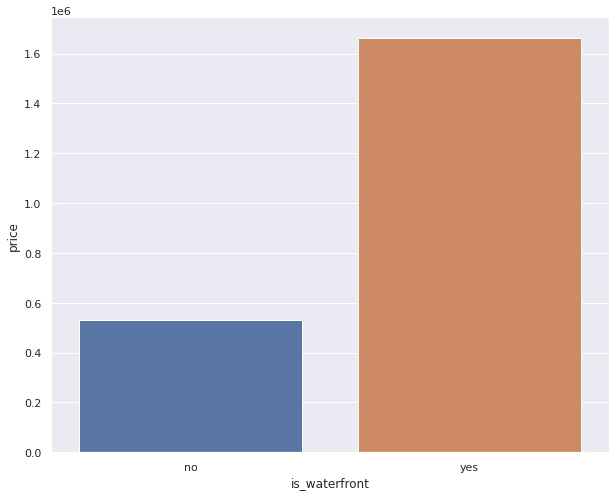

In [9]:
df1 = data.groupby('is_waterfront')['price'].mean().reset_index()
df1['%'] = df1['price'].pct_change()

porcen = (df1['%'][1])*100

print('\n'f'Imóveis com vista para a água são {porcen:.2f}% mais caros que os imóveis sem vista.')

plot_bar(df1, 'is_waterfront', 'price')

## H2 - Imóveis com data de construção menor que 1955 são 50% mais baratos, na média
Falso: Os imóveis com data de construção inferior a 1955 são, aproximadamente, 2% mais baratos

A quantidade de imóveis com ano até 1955: 6435
A quantidade de imóveis com ano de constução acima de 1955: 15178

Os imóveis com ano de construção menor que 1955 possuem valor 1.78% menor que os imóveis acima desse ano.


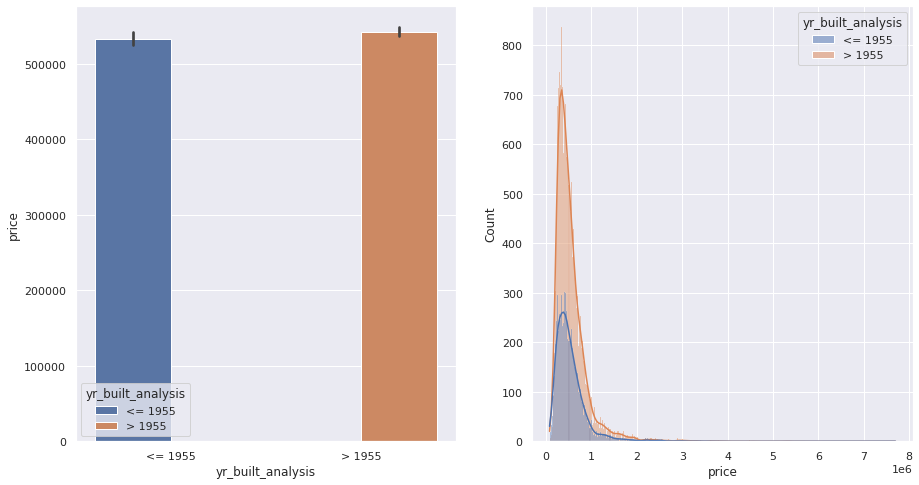

In [10]:
df2 = data.copy()
df2['yr_built_analysis'] = df2['yr_built'].apply(lambda x: '<= 1955' if x <= 1955 else '> 1955')

df2_aux = df2.groupby('yr_built_analysis')['price'].mean().reset_index()
df2_aux['%'] = df2_aux['price'].pct_change()

porcen_df2 = (df2_aux['%'][1])*100

df2_m = df2[df2['yr_built_analysis']=='<= 1955']
df2_p = df2[df2['yr_built_analysis']=='> 1955']

print(f'A quantidade de imóveis com ano até 1955: {len(df2_m)}')
print(f'A quantidade de imóveis com ano de constução acima de 1955: {len(df2_p)}')
print('\n'f'Os imóveis com ano de construção menor que 1955 possuem valor {porcen_df2:.2f}% menor que os imóveis acima desse ano.')

plot_bar_hist(df2, 'yr_built_analysis', 'price', 'yr_built_analysis')

## H3 - Imóveis sem porão são 50% maiores que com porão
Falso: Imóveis sem porão são, aproximadamente, 23% mais baratos

A média do tamanho do imóvel sem porão é de: 1928.88
A média do tamanho do imóvel com porão é de: 1571.11

Imóveis sem porão são 22.77% maiores que imóveis com porão.


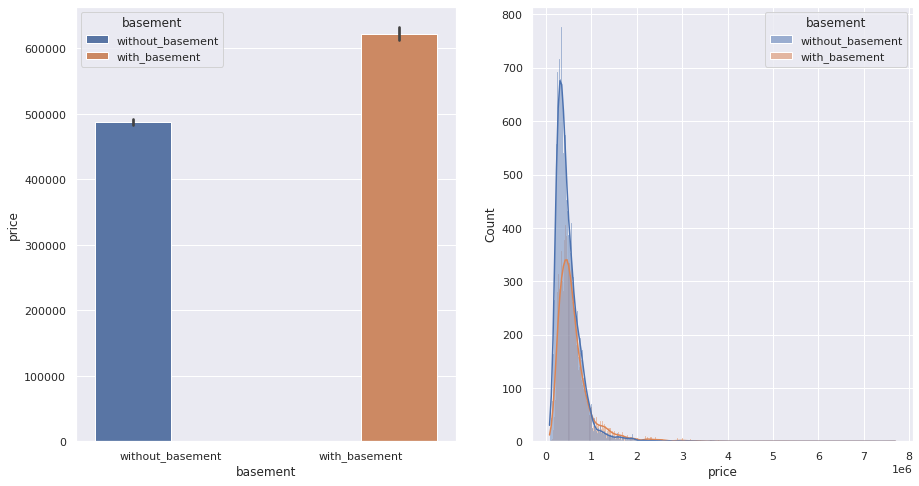

In [11]:
df3 = data.copy()
df3['basement'] = df3['sqft_basement'].apply(lambda x: 'without_basement' if x == 0 else 'with_basement')

no_basement = data.loc[data['sqft_basement'] == 0, 'sqft_above'].mean()
with_basement = data.loc[data['sqft_basement'] > 0, 'sqft_above'].mean()
dif = ((no_basement/with_basement)-1)*100

print(f'A média do tamanho do imóvel sem porão é de: {no_basement:.2f}')
print(f'A média do tamanho do imóvel com porão é de: {with_basement:.2f}')

print('\n'f'Imóveis sem porão são {dif:.2f}% maiores que imóveis com porão.')

plot_bar_hist(df3, 'basement', 'price', 'basement')

## H4 - O crescimento do preço dos imóveis YoY é de 10%
Falso: O crescimento "Year of Year" é de 0,5%


O crescimento do preço dos imóveis YoY é de 0.52%


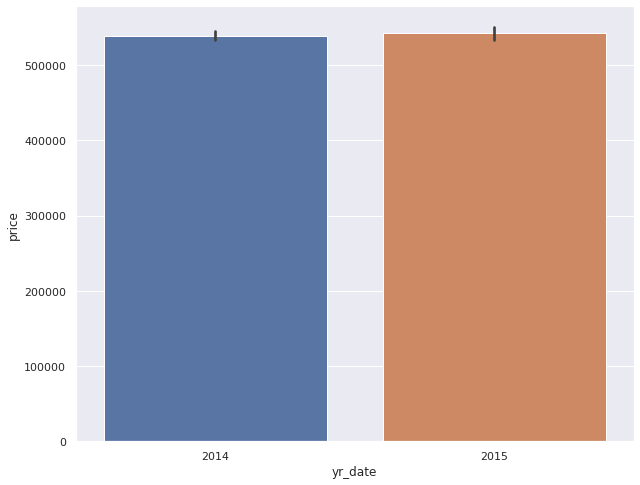

In [12]:
df4 = data.groupby('yr_date')['price'].mean().reset_index()
df4['%'] = df4['price'].pct_change()

dif_df4 = (df4['%'][1])*100

print('\n'f'O crescimento do preço dos imóveis YoY é de {dif_df4:.2f}%')

plot_bar(data, 'yr_date', 'price')

## H5 - Imóveis com 3 banheiros tem um crescimento MoM de 15%
 Falso: A variação "Month of Month" varia bastante entre os meses, mas não chega a 15%

In [13]:
df5 = data.loc[data['bathrooms'] == 3]
df5_aux = df5.groupby('month_date')['price'].mean().reset_index()
df5_aux['%'] = df5_aux['price'].pct_change()
df5_aux['color'] = df5_aux['%'].apply(lambda x: 'negative' if x < 0 else 'positive')

df5_aux

month_date     price     %     color
0            1 672923.17   NaN  positive
1            2 696714.42  0.04  positive
2            3 768495.10  0.10  positive
3            4 709751.99 -0.08  negative
4            5 689252.10 -0.03  negative
5            6 775057.56  0.12  positive
6            7 741405.04 -0.04  negative
7            8 737576.56 -0.01  negative
8            9 645246.89 -0.13  negative
9           10 645523.02  0.00  positive
10          11 679910.47  0.05  positive
11          12 728341.19  0.07  positive

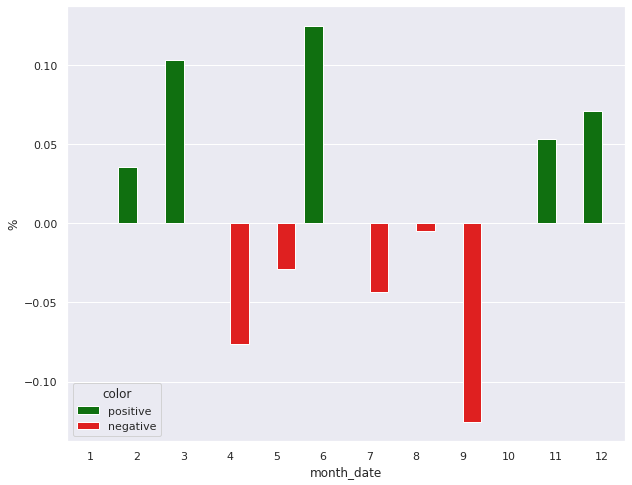

In [14]:
plot_bar(df5_aux, 'month_date', '%', 'color',['Green', 'Red'])

## H6 - A maioria dos imóveis com vista para a água possuem estado de conservação "good"
Falso: A grande maioria possui estado de conservação "regular"

A quantidade de imóveis na condição "bad" é de 2
A quantidade de imóveis na condição "good" é de 20
A quantidade de imóveis na condição "regular" é de 141



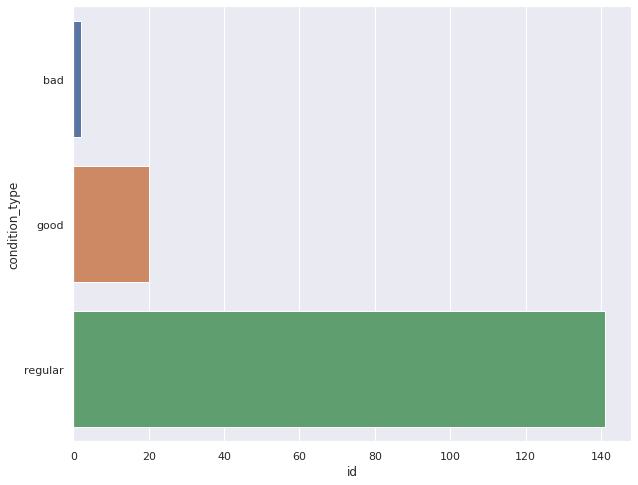

In [15]:
df6 = data.loc[data['is_waterfront'] == 'yes']
df6 = df6.groupby('condition_type')['id'].count().reset_index()

lista_id = list(df6['id'])

print(f'A quantidade de imóveis na condição "bad" é de {lista_id[0]}')
print(f'A quantidade de imóveis na condição "good" é de {lista_id[1]}')
print(f'A quantidade de imóveis na condição "regular" é de {lista_id[2]}''\n')

plot_bar(df6, 'id', 'condition_type')

## H7 - Imóveis mais novos possuem preço médio maior
Verdadeiro: Imóveis mais novos são 18% mais caros que os antigos

A quantidade de imóveis "new" é 4541 e média dos preços é 615314.92
A quantidade de imóveis "old" é 17072 e a média dos preços é 520078.49
Os imóveis novos são 18.31% mais caros que os antigos



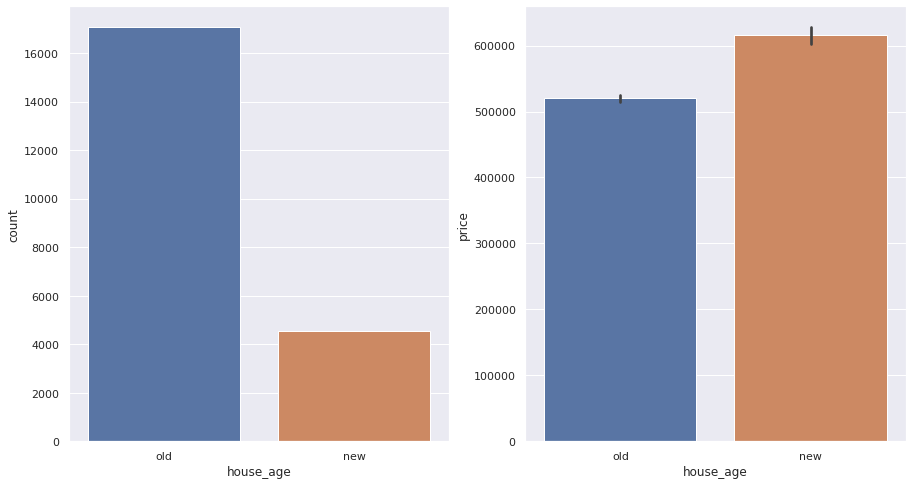

In [16]:
new = len(data.loc[data['house_age'] == 'new'])
old = len(data.loc[data['house_age'] == 'old'])
new_mean = data.loc[data['house_age'] == 'new', 'price'].mean()
old_mean = data.loc[data['house_age'] == 'old', 'price'].mean()

print(f'A quantidade de imóveis "new" é {new} e média dos preços é {new_mean:.2f}')
print(f'A quantidade de imóveis "old" é {old} e a média dos preços é {old_mean:.2f}')
print(f'Os imóveis novos são {((new_mean/old_mean)-1)*100:.2f}% mais caros que os antigos''\n')

plot_count_bar(data, 'house_age', y='price')

## H8 - Imóveis com 2 andares possuem preço médio maior que a mediana
Verdadeiro: Imóveis com 2 andares possuem maior quantidade e possuem preço médio maior que a mediana

Quantidade de imóveis com 2 andares: 8241

A mediana dos preços de imóveis com 2 andares: 542950.00
A média dos preços de imóveis com 2 andares: 648891.16



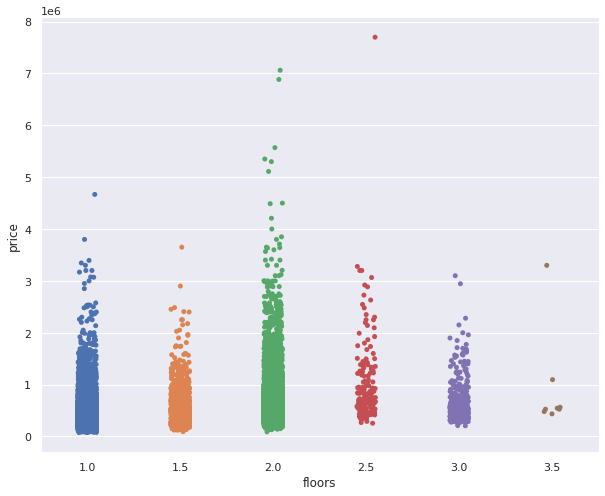

In [17]:
df8 = data.loc[data['floors'] == 2]
df8_median = np.median(df8['price'])
df8_mean =  np.mean(df8['price'])

print(f'Quantidade de imóveis com 2 andares: {len(df8)}')

print('\n'f'A mediana dos preços de imóveis com 2 andares: {df8_median:.2f}')
print(f'A média dos preços de imóveis com 2 andares: {df8_mean:.2f}''\n')


plot_strip(data, 'floors', 'price')

## H9 - Imóvel antigo com reforma feita, são mais caros que aqueles sem reforma
Verdadeiro: Imóveis antigos já reformados, são 50% mais caros que os imóveis sem reforma

Quantidade de imóveis antigos e que possuem vista para a água: 145
Quantidade de imóveis antigos reformados com vista para a água: 42

Imóveis antigos com reforma, são 50.11% mais caros que aqueles sem reforma.



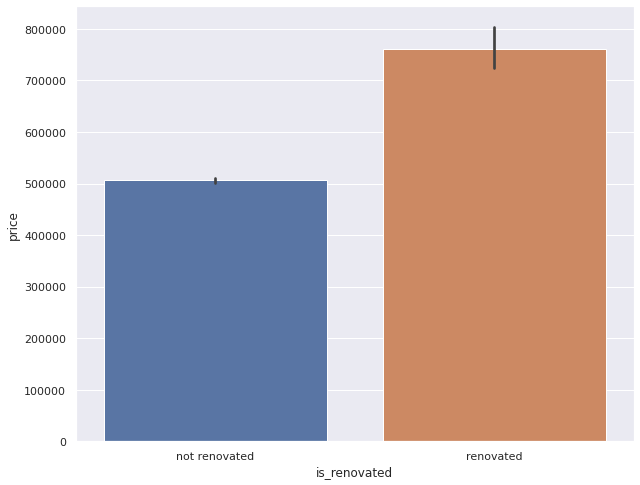

In [18]:
df9 = data.loc[(data['house_age'] == 'old')]
df9_aux = df9.groupby('is_renovated')['price'].mean().reset_index()
df9_aux['%'] = df9_aux['price'].pct_change()

porc_df9 = (df9_aux['%'][1])*100
cont_1 = len(df9.loc[(df9['is_waterfront'] == 'yes')])
cont_2 = len(df9.loc[(df9['is_waterfront'] == 'yes') & (df9['is_renovated'] == 'renovated')])

print(f'Quantidade de imóveis antigos e que possuem vista para a água: {cont_1}')
print(f'Quantidade de imóveis antigos reformados com vista para a água: {cont_2}')
print('\n'f'Imóveis antigos com reforma, são {porc_df9:.2f}% mais caros que aqueles sem reforma.''\n')

plot_bar(df9, 'is_renovated', 'price')

## H10 - A maioria dos imóveis do tipo "apartament" possuem estado de conservação "good" 
Falso: A grande parte dos imóveis do tipo "apartament" possuem estado de conservação "regular"


A quantidade de imóveis do tipo "apartament" em condições "bad": 63
A quantidade de imóveis do tipo "apartament" em condições "regular": 200
A quantidade de imóveis do tipo "apartament" em condições "good": 2497



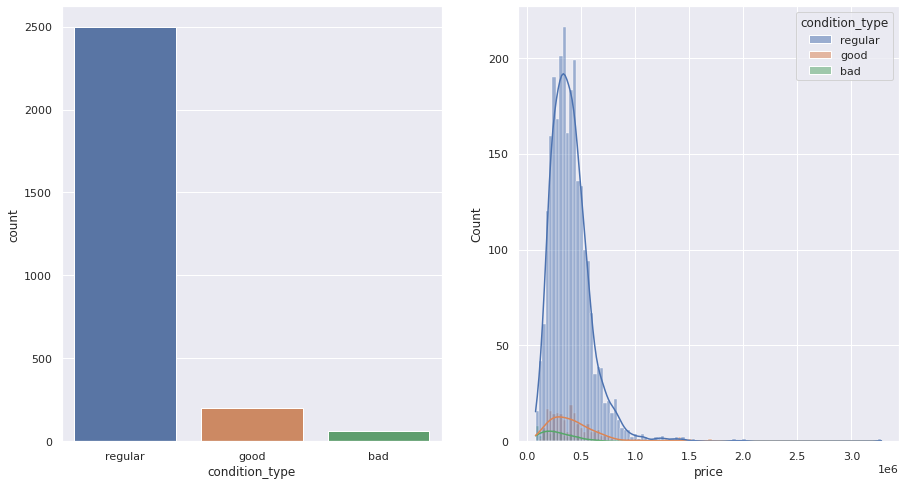

In [19]:
df10 = data.loc[data['domitory_type'] == 'apartament']
df10_aux = df10.groupby('condition_type')['id'].count().reset_index()

df10_count = list(df10_aux['id'])

print('\n'f'A quantidade de imóveis do tipo "apartament" em condições "bad": {df10_count[0]}')
print(f'A quantidade de imóveis do tipo "apartament" em condições "regular": {df10_count[1]}')
print(f'A quantidade de imóveis do tipo "apartament" em condições "good": {df10_count[2]}''\n')

plot_count_hist(df10, 'condition_type', 'price', 'condition_type')

## Hypotheses result 

In [20]:
table = [['Hypotheses', 'Conclusion', 'Relevance'],
       ['H1', 'Falsa', 'Alta'],
       ['H2', 'Falsa', 'Alta'],
       ['H3', 'Falso', 'Média'],
       ['H4', 'Falso', 'Alta'],
       ['H5', 'Falso', 'Alta'],
       ['H6', 'Falso', 'Baixa'],
       ['H7', 'Verdadeira', 'Baixo'],
       ['H8', 'Verdadeira', 'Médio'],
       ['H9', 'Verdadeira', 'Alta'],
       ['H10', 'Falso', 'Media']
      ]
print(tabulate(table, headers='firstrow'))

Hypotheses    Conclusion    Relevance
------------  ------------  -----------
H1            Falsa         Alta
H2            Falsa         Alta
H3            Falso         Média
H4            Falso         Alta
H5            Falso         Alta
H6            Falso         Baixa
H7            Verdadeira    Baixo
H8            Verdadeira    Médio
H9            Verdadeira    Alta
H10           Falso         Media


## Hypotheses comments

    H1: Imóveis com vista para a água são 30%, na média
        - Falso: Imóveis com vista para a água são 212% mais caros
        - Mesmo possuindo grande parte dos imóveis em condições "regular", o preço é muito maior que 
          aqueles imóveis que não possuem vista para a água (Hipótese 6)
        - Isso nos mostra que ao simples fato de ter vista para a água o imóvel torna-se bastante valorizado
        - A sugestão seria reformar esses imóveis em condições "regular" para aumentar o preço dos imóveis
    
    H2: Imóveis com data de construção menor que 1955 são 50% mais baratos na média
        - Falso: Os imóveis com data de construção menor que 1955, são 1,78% mais baratos que aqueles 
          com ano de construção acima dessa data
        - O valor é bem próximo, mesmo com uma quantidade maior de imóveis com data acima de 1955
        - Essa situação pode ser explicada pela quantidade de imóveis com um preço maior, fazendo com que
          a média fosse maior
    
    H5: Imóveis com 3 banheiros possuem um crescimento de MoM de 15%
        - Falso: A variação mês a mês varia bastante, mas não chega a 15%
        - Essa situação se deve ao fator clima, como na localidade há neve em determinado período do ano
          a procura e visita por imóveis cai e tendo uma demanda baixa a tendência é reduzir os preços
          para atrair compradores
        - A sugestão seria verificar os meses que há recuperação dos preços para focar na venda dos imóveis
    
    H9: Imóvel antigo com reforma feita, são mais caros que aqueles sem reforma
        - Verdadeiro: Imóveis antigos já reformados, são 50% mais caros que os imóveis sem reforma
        - Grande parte dos imóveis antigos possuem vista para a água e apenas 42 foram reformados
        - A sugestão nesse caso seria reformar esses imóveis para agregar ainda mais o valor

# 6 - CEO questions

    - Q1: Quais são os imóveis que a House Rocket deve comprar?
    - Q2: Uma vez o imóvel comprado, qual o melhor preço para vendê-los?

## Q1: Quais são os imóveis que a House Rocket deve comprar?
    Regras para compra:
    - Imóveis com preço abaixo da mediana da região
    - Tenha condição "regular" ou "good"

In [21]:
# Aplicando as regras de compra
data_1 = data.copy()
data_2 = data_1.groupby('zipcode')['price'].median().reset_index()
data_2.rename(columns={'price':'price_median'}, inplace=True)

data_1 = pd.merge(data_1, data_2, on=['zipcode'], how='left')
data_1['purchase'] = data_1[['price', 'condition', 'price_median']].apply(lambda x: 'buy' 
                                                                          if ((x['price'] < x['price_median']) &
                                                                             ((x['condition'] == 3) | 
                                                                              (x['condition'] == 4) |
                                                                              (x['condition'] == 5)))
                                                                          else 'not buy', axis=1)

# Quantidade de imóveis
dt1 = data_1[data_1['purchase'] == 'buy']

print(f'Quantidade de imóveis disponível: {len(data_1)}')
print(f'Quantidade de imóveis classificados para a compra: {len(dt1)}')

Quantidade de imóveis disponível: 21613
Quantidade de imóveis classificados para a compra: 10579


## Q2: Uma vez o imóvel comprado, qual o melhor o preço para vendê-los?
    Regras para venda:
    - Se o preço de compra for maior que a mediana da região, o preço de venda será o preço de compra + 10%
    - Se o preço de compra for menor que a mediana da região, o preço de venda será o preço de compra + 30%

In [22]:
# Adicionando o preço de venda

data_1['sales_price'] = data_1[['price', 'price_median']].apply(lambda x: (x['price']*1.10) 
                                                                if (x['price'] > x['price_median']) 
                                                                else (x['price']*1.30), axis=1)
data_1['profit'] = data_1['sales_price'] - data_1['price']

# 7 - MAP

In [64]:
list_house = ['id', 'lat', 'long', 'condition_type', 'purchase']

house_map = data_1.groupby(list_house)[['sales_price', 'profit', 'price']].mean().reset_index()

# Mapa
fig = px.scatter_mapbox(house_map, 
                       lat='lat', 
                       lon='long',
                       color='condition_type', 
                       size='price', 
                       hover_data={'id': False, 'lat':False, 'long':False, 'purchase':True,
                                    'price':':.2f','sales_price':':.2f', 'profit':':.2f'},
                       category_orders={'condition_type':['good', 'regular', 'bad']}, 
                       color_discrete_sequence=['blue', 'green', 'maroon'], 
                       size_max=15, 
                       zoom=10)

fig.update_layout(mapbox_style = 'open-street-map')
fig.update_layout(height = 600, margin = {'r':0, 'l':0, 'b':0, 't':0})
fig.show()

# 8 - Final report

In [24]:
# Criando o arquivo para o CEO com os dados dos imóveis
data_1.to_csv('kc_house_data_report.csv')


# Resumo dos principais resultados
dt2 = dt1['price'].sum()
dt3 = data_1.loc[data_1['purchase'] == 'buy', 'sales_price'].sum()

print(f'Total do investimento caso haja a compra de todos os imóveis classificados para compra: ${dt2:.2f}')
print(f'O valor da venda dos imóveis classificados: ${dt3:.2f}')
print(f'O lucro obtido pela venda desses imóveis: ${(dt3-dt2):.2f}')

Total do investimento caso haja a compra de todos os imóveis classificados para compra: $4094212008.00
O valor da venda dos imóveis classificados: $5322475610.40
O lucro obtido pela venda desses imóveis: $1228263602.40
